In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

/home/kaustubh/miniconda3/envs/MMO/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# Analysis for the BLASTp search against the Uniprot's UniRef50 dataset

Ran the BLASTp search online in the Uniprot's interface: `https://www.uniprot.org/blast` \
With an e-value cutoff of 1

In [20]:
blastp_uniref50_hits = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/1MTY_MMO_uniref50_eval_1.tsv", sep="\t")
blastp_uniref50_hits.drop(columns=["Hit", "DB"], inplace=True)
blastp_uniref50_hits.rename(columns={"E()":"E_value"}, inplace=True)

## Remove hits with E-value >= 1
blastp_uniref50_hits = blastp_uniref50_hits[blastp_uniref50_hits["E_value"] < 1] 
blastp_uniref50_hits["Accession"] = blastp_uniref50_hits["Accession"].str.split("_").str[1]
blastp_uniref50_hits['log10_neg_evalue'] = blastp_uniref50_hits['E_value'].apply(lambda x: -np.log10(x) if x > 0 else 200)
blastp_uniref50_hits

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819
...,...,...,...,...,...,...,...,...,...
129,UPI0027E0D62B,hypothetical protein n=1 Tax=Actinoplanes poly...,Actinoplanes polyasparticus,62,91,34.8,60.9,2.700000e-01,0.568636
130,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216
131,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430
132,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481


/tmp/ipykernel_1109756/3860499424.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(blastp_uniref50_hits['log10_neg_evalue'], kde=True)


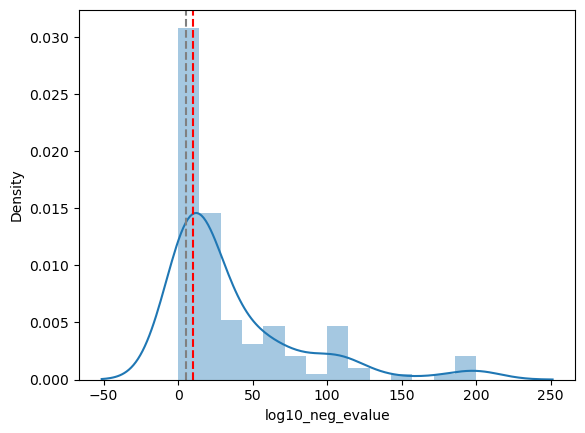

In [21]:
sns.distplot(blastp_uniref50_hits['log10_neg_evalue'], kde=True)
plt.axvline(x=5, color='gray', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')

In [22]:
## Save the unique target IDs to a file

with open("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/uniq_combined_hits_uniprot_ids_below_eval_1.txt", "w") as f:
    for target_id in blastp_uniref50_hits['Accession'].unique():
        f.write(f"{target_id}\n")

In [23]:
uniref50_hits_uniprot_mapping = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/idmapping_2025_07_31.tsv", sep='\t')
uniref50_hits_uniprot_mapping.drop(columns=["Entry", "Organism", "Length"], inplace=True)
uniref50_hits_uniprot_mapping

,From,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence
0,P22869,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...
1,Q8KMH0,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...
2,E0WMN7,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...
3,Q934P5,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...
4,Q8L2N2,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...
...,...,...,...,...,...,...,...
110,W0UE87,unreviewed,W0UE87_9BACT,Soluble diiron monooxygenase,rhmo,"cellular organisms (no rank), Bacteria (domain...",ELRHGQTQVHTISHYNKYFDGIGEFPHMHDRVWYLSVPKSFFDDAR...
111,A0A957VW64,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...
112,D2K2D8,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...
113,A0A923M441,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...


In [24]:
blastp_uniref50_hits = blastp_uniref50_hits.merge(uniref50_hits_uniprot_mapping, left_on="Accession", right_on="From", how="left")
blastp_uniref50_hits.drop(columns=["From"], inplace=True)

## Entries with empty "Protein names", add the info from "Description" there

blastp_uniref50_hits['Protein names'] = blastp_uniref50_hits['Protein names'].fillna(blastp_uniref50_hits['Description'])
blastp_uniref50_hits

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,UPI0027E0D62B,hypothetical protein n=1 Tax=Actinoplanes poly...,Actinoplanes polyasparticus,62,91,34.8,60.9,2.700000e-01,0.568636,NaN,NaN,hypothetical protein n=1 Tax=Actinoplanes poly...,NaN,NaN,NaN
130,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...
131,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...
132,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...


#### Many of the entries didn't find a mapping in UniProt -- all starting with UPI, these are the cluster id sequences; so gathered their sequence separately

In [25]:
uniref50_upi_hits_mapping = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/idmapping_upi_uniref50_hits.tsv", sep='\t')
uniref50_upi_hits_mapping["Accession"] = uniref50_upi_hits_mapping["From"].str.split("_").str[1]
uniref50_upi_hits_mapping = uniref50_upi_hits_mapping[["Accession", "Reference sequence"]]
uniref50_upi_hits_mapping

,Accession,Reference sequence
0,UPI001300AE96,MTQLTLNKITAQRGISVGEATKRISDLGWNPSYVQEAATFPTDYKI...
1,UPI002954B6E0,MTSMLPRTTATNGDLKLDGQDVHKWLMDLGWDSDTLRGKYPTKYTY...
2,UPI002CE5D7E9,LAIQLNFVFETGFTNLQFMAMAALADRAHHHLFEKTLASIQTDEAR...
3,UPI0027E0D62B,MFHSVQSDESRHISNGYATLLMALADEGNHQLLERDLRYAWWNNHR...
4,UPI002104C456,MATLGQLAPGDDLRTGFTMQMIDEFRHSTIQMNLKKWYMENYIDPA...
5,UPI001E356853,MTASVTTQHEKIKSFDWEPSYFHRDALYPTKYKIPPKTKDPFRTLV...
6,UPI001C7CEE22,MPKLQRHDYYDTARDMNWPFTYVPEEEAFPEALSKSFGIASEKWWG...
7,UPI001EF8F9BF,MVPSIHAPETRIVYGEGKKFAVCSEGCEWIFNLNPTIYSGCANWWE...
8,UPI0027284728,MTCRAKRSRPADGKTLIAQPVLKPKRMWTIDDIRRCKYEVVSPLRA...
9,UPI00158B0526,MTLTLNKITSQRGISVGEATKKIADLGWNPTYVQEAATFPTDYKIT...


In [26]:
blastp_uniref50_hits = blastp_uniref50_hits.merge(uniref50_upi_hits_mapping, on="Accession", how="left")
blastp_uniref50_hits['Sequence'] = blastp_uniref50_hits['Sequence'].fillna(blastp_uniref50_hits['Reference sequence'])

## Drop entries without a sequence
blastp_uniref50_hits = blastp_uniref50_hits[blastp_uniref50_hits['Sequence'].notna()]
blastp_uniref50_hits

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence,Reference sequence
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,NaN
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...,NaN
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...,NaN
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...,NaN
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,UPI0027E0D62B,hypothetical protein n=1 Tax=Actinoplanes poly...,Actinoplanes polyasparticus,62,91,34.8,60.9,2.700000e-01,0.568636,NaN,NaN,hypothetical protein n=1 Tax=Actinoplanes poly...,NaN,NaN,MFHSVQSDESRHISNGYATLLMALADEGNHQLLERDLRYAWWNNHR...,MFHSVQSDESRHISNGYATLLMALADEGNHQLLERDLRYAWWNNHR...
130,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...,NaN
131,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...,NaN
132,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...,NaN


## Manually curating the different groups of sequences based on the description/title

In [27]:
blastp_uniref50_hits['Protein names'].unique()

array(['Methane monooxygenase component A alpha chain (EC 1.14.13.25) (Methane hydroxylase)',
       'Soluble methane monooxygenase component A alpha subunit',
       'Soluble methane monooxygenase alpha subunit',
       'Soluble methane monooxygenase hydroxylase',
       'Soluble methane monooxygenase',
       'Soluble methane monooxygenase A-protein alpha-subunit',
       'propane 2-monooxygenase (EC 1.14.13.227)', 'MmoX',
       'Soluble di-iron monooxygenase alpha subunit',
       'hypothetical protein n=1 Tax=Rhodococcus sp. IEGM 27 TaxID=3082230 RepID=UPI002954B6E0',
       'Methane monooxygenase',
       'Propane 2-monooxygenase, hydroxylase component large subunit (EC 1.14.13.227) (Acetone 1-monooxygenase) (Methylethylketone 1-monooxygenase) (Phenol 4-monooxygenase)',
       'Putative butane monooxygenase alpha subunit', 'Monooxygenase',
       'Methane monooxygenase component A alpha chain (EC 1.14.13.25)',
       '2Fe-2S iron-sulfur cluster-binding protein n=1 Tax=Salipiger s

In [28]:
Methane_monooxygenase =[
'Methane monooxygenase component A alpha chain (EC 1.14.13.25) (Methane hydroxylase)',
'Soluble methane monooxygenase component A alpha subunit',
'Soluble methane monooxygenase alpha subunit',
'Soluble methane monooxygenase hydroxylase',
'Soluble methane monooxygenase',
'Soluble methane monooxygenase A-protein alpha-subunit',
'Methane monooxygenase',
'Methane monooxygenase component A alpha chain (EC 1.14.13.25)',
'Soluble methane monooxygenase subunit A',
'Methane monooxygenase alpha subunit (Soluble di-iron monooxygenase alpha subunit)',
'MmoX'
]

Propane_monooxygenase = [
'propane 2-monooxygenase (EC 1.14.13.227)', 
'Propane 2-monooxygenase, hydroxylase component large subunit (EC 1.14.13.227) (Acetone 1-monooxygenase) (Methylethylketone 1-monooxygenase) (Phenol 4-monooxygenase)',
'Propane monooxygenase'
]

Toluene_monooxygenase = [
'Toluene monooxygenase',
'Toluene-4-monooxygenase system, hydroxylase component subunit alpha (T4MO) (EC 1.14.13.236) (Toluene-4-monooxygenase hydroxylase subunit) (T4moH) (Toluene-4-monooxygenase system protein A) (T4moA)',
'Toluene monooxygenase system protein A',
'Toluene-4-monooxygenase system protein A (EC 1.14.13.-)',
'Toluene-4-monooxygenase system protein A. carboxy end (TmoA) (EC 1.14.13.-)',
'Toluene monooxygenase subunit',
'Toluene-4-monooxygenase system protein A. amino end (TmoA) (EC 1.14.13.-)'
]

Other_monooxygenase = [
'Soluble di-iron monooxygenase alpha subunit',
'Putative butane monooxygenase alpha subunit', 
'Monooxygenase',
'Soluble di-iron monooxygenase', 
'Alkene monooxygenase system, oxygenase component subunit alpha (EC 1.14.13.69)',
'Phenol 2-monooxygenase, oxygenase component DmpN (EC 1.14.13.244) (Phenol 2-monooxygenase P3 component) (Phenol hydroxylase P3 protein)',
'Phenol 2-monooxygenase',
'Soluble diiron monooxygenase',
'Butane monooxygenase'
]

Hydroxylase = [
'Phenol hydroxylase component (EC 1.14.13.7)'
]

Ferritin_like = [
'Ferritin-like domain-containing protein'
]

YHS_domain_protein = [
'YHS domain-containing protein',
'YHS domain-containing protein n=3 Tax=Pseudomonadota TaxID=1224 RepID=UPI0035682FE4',
'YHS domain-containing protein n=1 Tax=Mycobacterium sp. TaxID=1785 RepID=UPI002CE5D7E9',
'YHS domain-containing protein n=1 Tax=Janibacter limosus TaxID=53458 RepID=UPI0021521DFD',
'YHS domain-containing protein n=1 Tax=Paraburkholderia sp. TaxID=1926495 RepID=UPI002B49CCAD'
]

Hypothetical_proteins = [
'hypothetical protein n=1 Tax=Rhodococcus sp. IEGM 27 TaxID=3082230 RepID=UPI002954B6E0',
'hypothetical protein n=1 Tax=Rhodococcus ruber TaxID=1830 RepID=UPI0024B6A6F2',
'hypothetical protein n=1 Tax=Azospirillum sp. INR13 TaxID=2596919 RepID=UPI002104C456',
'hypothetical protein n=1 Tax=Mycolicibacterium tusciae TaxID=75922 RepID=UPI001EF8F9BF',
'hypothetical protein n=1 Tax=Sinirhodobacter hankyongi TaxID=2294033 RepID=UPI001C7CEE22',
'hypothetical protein n=1 Tax=Mycobacterium sp. UM_Kg1 TaxID=1545691 RepID=UPI00195546A0',
'hypothetical protein n=1 Tax=Mycobacterium dioxanotrophicus TaxID=482462 RepID=UPI001E356853',
'hypothetical protein n=2 Tax=Bacteria TaxID=2 RepID=UPI0018D4001D',
'hypothetical protein n=1 Tax=Mycobacterium ulcerans TaxID=1809 RepID=UPI00214CB758',
'hypothetical protein n=1 Tax=Streptomyces lydicus TaxID=47763 RepID=UPI00342AB1B4',
'hypothetical protein n=1 Tax=Candidatus Binatus sp. TaxID=2811406 RepID=UPI0027284728',
'hypothetical protein n=1 Tax=Actinoplanes polyasparticus TaxID=2856853 RepID=UPI0027E0D62B',
'Uncharacterized protein',
'deleted'
]

Other = [
'2Fe-2S iron-sulfur cluster-binding protein n=1 Tax=Salipiger sp. HF18 TaxID=2721557 RepID=UPI00158B0526',
'TCP-1/cpn60 chaperonin family protein n=1 Tax=Pseudogemmobacter bohemicus TaxID=2250708 RepID=UPI001300AE96',
'FAD-binding oxidoreductase n=1 Tax=Streptomyces thermocarboxydovorans TaxID=59298 RepID=UPI0031D9A9C5',
'Trehalose-6-phosphate synthase (EC 2.4.1.15) (Osmoregulatory trehalose synthesis protein A) (UDP-glucose-glucosephosphate glucosyltransferase)'
]

In [29]:
major_group_names_ids = ["Methane_monooxygenase", "Propane_monooxygenase", "Toluene_monooxygenase", "Other_monooxygenase", "Hypothetical_proteins", "Hydroxylase", "YHS_domain_protein", "Ferritin_like", "Other"]
major_group_names = [Methane_monooxygenase, Propane_monooxygenase, Toluene_monooxygenase, Other_monooxygenase, Hypothetical_proteins, Hydroxylase, YHS_domain_protein, Ferritin_like, Other]
major_group_dict = {}

for i in range(len(major_group_names)):
    for j in major_group_names[i]:
        major_group_dict[j] = major_group_names_ids[i]

blastp_uniref50_hits['major_group'] = blastp_uniref50_hits['Protein names'].map(major_group_dict)
blastp_uniref50_hits

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence,Reference sequence,major_group
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,NaN,Methane_monooxygenase
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...,NaN,Methane_monooxygenase
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...,NaN,Methane_monooxygenase
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...,NaN,Methane_monooxygenase
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...,NaN,Methane_monooxygenase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,UPI0027E0D62B,hypothetical protein n=1 Tax=Actinoplanes poly...,Actinoplanes polyasparticus,62,91,34.8,60.9,2.700000e-01,0.568636,NaN,NaN,hypothetical protein n=1 Tax=Actinoplanes poly...,NaN,NaN,MFHSVQSDESRHISNGYATLLMALADEGNHQLLERDLRYAWWNNHR...,MFHSVQSDESRHISNGYATLLMALADEGNHQLLERDLRYAWWNNHR...,Hypothetical_proteins
130,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...,NaN,Methane_monooxygenase
131,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...,NaN,Propane_monooxygenase
132,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...,NaN,Other


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Methane_monooxygenase'),
  Text(1, 0, 'Propane_monooxygenase'),
  Text(2, 0, 'Other_monooxygenase'),
  Text(3, 0, 'Hypothetical_proteins'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'YHS_domain_protein'),
  Text(6, 0, 'Toluene_monooxygenase'),
  Text(7, 0, 'Hydroxylase'),
  Text(8, 0, 'Ferritin_like')])

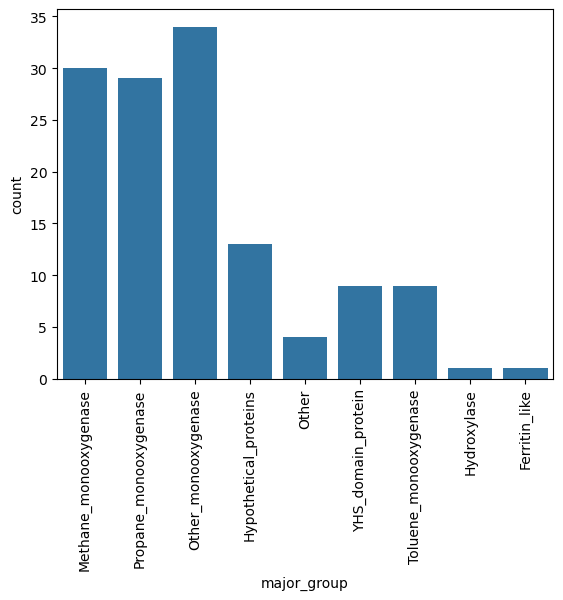

In [30]:
sns.countplot(data=blastp_uniref50_hits, x='major_group')
plt.xticks(rotation=90)

In [31]:
## Delete the entries annotated as hypothetical/Uncharacterized/deleted
blastp_uniref50_hits = blastp_uniref50_hits[blastp_uniref50_hits['major_group'] != "Hypothetical_proteins"]

In [32]:
query_1mty_seq = "MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKYATKYKMANETKEQFKLIAKEYARMEAVKDERQFGSLQDALTRLNAGVRVHPKWNETMKVVSNFLEVGEYNAIAATGMLWDSAQAAEQKNGYLAQVLDEIRHTHQCAYVNYYFAKNGQDPAGHNDARRTRTIGPLWKGMKRVFSDGFISGDAVECSLNLQLVGEACFTNPLIVAVTEWAAANGDEITPTVFLSIETDELRHMANGYQTVVSIANDPASAKYLNTDLNNAFWTQQKYFTPVLGMLFEYGSKFKVEPWVKTWNRWVYEDWGGIWIGRLGKYGVESPRSLKDAKQDAYWAHHDLYLLAYALWPTGFFRLALPDQEEMEWFEANYPGWYDHYGKIYEEWRARGCEDPSSGFIPLMWFIENNHPIYIDRVSQVPFCPSLAKGASTLRVHEYNGQMHTFSDQWGERMWLAEPERYECQNIFEQYEGRELSEVIAELHGLRSDGKTLIAQPHVRGDKLWTLDDIKRLNCVFKNPVKAFN"

In [34]:
msa_aa_seq_id_matrix = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/MMO_uniref50_blastp_MSA_aa_seq_id_matrix.csv")
msa_aa_seq_id_matrix.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

#### The `P22869` entry is same sequence as the query `1MTY`

In [35]:
blastp_uniref50_hits = pd.merge(blastp_uniref50_hits, msa_aa_seq_id_matrix[['id', 'P22869']], left_on="Accession", right_on="id", how="left")
blastp_uniref50_hits.rename(columns={'P22869': 'aa_seq_id_wrt_1MTY'}, inplace=True)

blastp_uniref50_hits

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence,Reference sequence,major_group,id,aa_seq_id_wrt_1MTY
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,NaN,Methane_monooxygenase,P22869,NaN
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...,NaN,Methane_monooxygenase,Q8KMH0,83.0
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...,NaN,Methane_monooxygenase,E0WMN7,81.0
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...,NaN,Methane_monooxygenase,Q934P5,82.0
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...,NaN,Methane_monooxygenase,Q8L2N2,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,W0UE87,Soluble diiron monooxygenase (Fragment) n=7 Ta...,Bacteria,132,97,28.7,40.9,1.900000e-01,0.721246,unreviewed,W0UE87_9BACT,Soluble diiron monooxygenase,rhmo,"cellular organisms (no rank), Bacteria (domain...",ELRHGQTQVHTISHYNKYFDGIGEFPHMHDRVWYLSVPKSFFDDAR...,NaN,Other_monooxygenase,W0UE87,24.0
113,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...,NaN,Methane_monooxygenase,A0A957VW64,26.0
114,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...,NaN,Propane_monooxygenase,D2K2D8,9.0
115,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...,NaN,Other,A0A923M441,8.0


<Axes: xlabel='aa_seq_id_wrt_1MTY', ylabel='Count'>

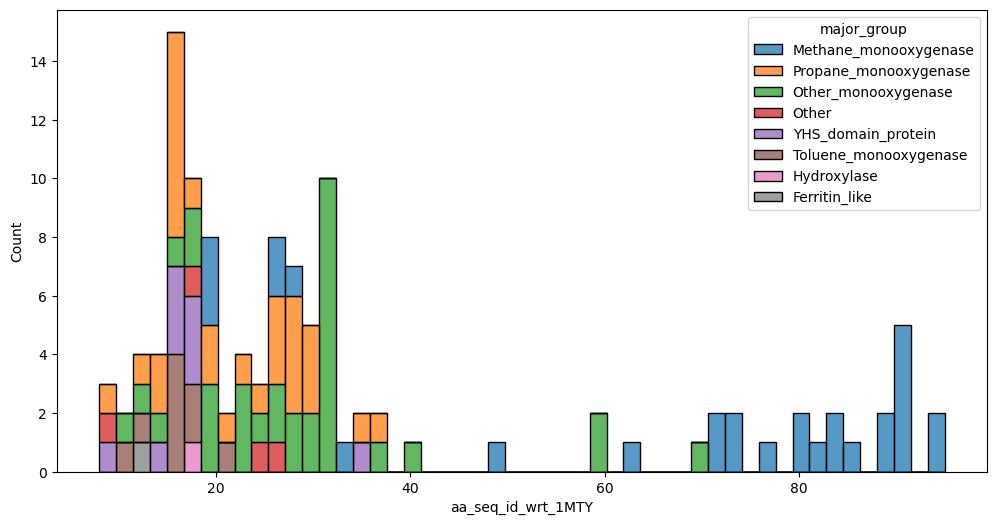

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(data=blastp_uniref50_hits, x='aa_seq_id_wrt_1MTY', hue="major_group", multiple="stack", bins=50)

In [37]:
blastp_uniref50_hits.to_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/filtered_blastp_uniref50_hits_all_info_df.tsv", index=False, header=True, sep="\t")

### Write the sequences to a fasta file for downstream phylogenetic analysis

In [96]:
fasta_writeable = [SeqRecord(Seq(row['Sequence']), id=row['Accession'], description="") for _, row in blastp_uniref50_hits.iterrows()]
SeqIO.write(fasta_writeable, "/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/MMO_uniref50_blastp_output_seqs.fasta", "fasta")

117

In [ ]:
## Bash commands

mafft --anysymbol --maxiterate 1000 --thread 15 MMO_uniref50_blastp_output_seqs.fasta > MMO_uniref50_blastp_output_seqs.mafft.fasta 

iqtree -s ./MMO_uniref50_blastp_output_seqs.mafft.fasta -m MFP+MERGE --seqtype AA -B 1000 --alrt 1000 -bnni -T 15

# Analysis for the BLASTp search against the NCBI nr dataset

### Query for the BLASTp search is the 'D' subunit from the `1MTY` pdb structure

In [ ]:
### The command for running blastp remotely
/home/kaustubh/miniconda3/bin/blastp -query query_MMO_seq.fasta -db nr -out MMO_blastp_output.csv -outfmt '10 qstart qend sstart send sacc ssciname stitle evalue qlen sseq' -evalue 0.00000001 -max_target_seqs 10000000 -remote

In [2]:
## There's an issue with the blastp output csv file; the title column has commas in it, which causes the csv to be read incorrectly.
### So this function readas the file linewise, and arrange accordingly

def custom_split(line):
    parts = line.strip().split(',')
    
    first_cols = parts[:6]    
    last_cols = parts[-3:]
    middle_col = [','.join(parts[6:-3])]
    
    return first_cols + middle_col + last_cols

In [ ]:
with open("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_ncbi_nr/MMO_blastp_output.csv", "r") as f:
    lines = f.readlines()

combined_lines = [custom_split(line) for line in lines]
column_names = ['qstart', 'qend', 'sstart', 'send', 'sacc', 'ssciname', 'stitle', 'evalue', 'qlen', 'sseq']

blastp_MMO_output = pd.DataFrame(combined_lines, columns=column_names)

## Remove the 'ssciname' column; since all entries are 'N/A'
blastp_MMO_output.drop(columns=['ssciname'], inplace=True)

## change the data types of the columns
blastp_MMO_output['qstart'] = blastp_MMO_output['qstart'].astype(int)
blastp_MMO_output['qend'] = blastp_MMO_output['qend'].astype(int)
blastp_MMO_output['sstart'] = blastp_MMO_output['sstart'].astype(int)
blastp_MMO_output['send'] = blastp_MMO_output['send'].astype(int)
blastp_MMO_output['evalue'] = blastp_MMO_output['evalue'].astype(float)
blastp_MMO_output['qlen'] = blastp_MMO_output['qlen'].astype(int)

blastp_MMO_output['q_aln_len'] = blastp_MMO_output['qend'] - blastp_MMO_output['qstart'] + 1
blastp_MMO_output['s_aln_len'] = blastp_MMO_output['send'] - blastp_MMO_output['sstart'] + 1

## I checked previously, the 's_aln_len' is same as len(sseq) after removing gaps, so directly replacing the gaps in the sseq entries
blastp_MMO_output['sseq'] = blastp_MMO_output['sseq'].apply(lambda x: x.strip().replace('-', ''))

blastp_MMO_output['log10_neg_evalue'] = blastp_MMO_output['evalue'].apply(lambda x: -np.log10(x) if x > 0 else 200)
blastp_MMO_output

,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue
0,1,527,1,527,WP_010960482,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000
1,1,527,1,527,WP_333689019,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000
2,1,527,1,527,1FYZ_A,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000
3,1,527,1,527,WP_198323378,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPASVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000
4,1,526,1,526,WP_266022270,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,526,526,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9370,46,387,37,374,WP_415070450,toluene monooxygenase [Hyphomicrobium sp.],0.000008,527,YGIGMEFWEEFDEPYKVTYRDYVQTQREKEVGAYSVKSATSRSEFY...,342,338,5.080922
9371,201,393,2,191,WP_325692884,"YHS domain-containing protein, partial [Mycoba...",0.000009,527,AIQLNFVFETGFTNLQFMAMAALADRAHHHLFEKTLASIQTDEARH...,193,190,5.037157
9372,57,383,22,343,MFZ9238208,phenol 2-monooxygenase [Burkholderiaceae bacte...,0.000009,527,QDPFKMTLDVWWRQQSEKDRRLYAVLDAFAQNNGQIGVSDARYVNA...,327,322,5.025488
9373,185,387,35,234,MFZ0874727,MmoB/DmpM family protein [Pseudonocardiaceae b...,0.000010,527,RATFDGMMMNPNVVDVAVQLPFTFETGFTNVQFVALSADALESGDI...,203,200,5.019542


In [4]:
# find the protein sequences that are identical
blastp_MMO_output['sseq'].unique()

array(['MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKYATKYKMANETKEQFKLIAKEYARMEAVKDERQFGSLQDALTRLNAGVRVHPKWNETMKVVSNFLEVGEYNAIAATGMLWDSAQAAEQKNGYLAQVLDEIRHTHQCAYVNYYFAKNGQDPAGHNDARRTRTIGPLWKGMKRVFSDGFISGDAVECSLNLQLVGEACFTNPLIVAVTEWAAANGDEITPTVFLSIETDELRHMANGYQTVVSIANDPASAKYLNTDLNNAFWTQQKYFTPVLGMLFEYGSKFKVEPWVKTWNRWVYEDWGGIWIGRLGKYGVESPRSLKDAKQDAYWAHHDLYLLAYALWPTGFFRLALPDQEEMEWFEANYPGWYDHYGKIYEEWRARGCEDPSSGFIPLMWFIENNHPIYIDRVSQVPFCPSLAKGASTLRVHEYNGQMHTFSDQWGERMWLAEPERYECQNIFEQYEGRELSEVIAELHGLRSDGKTLIAQPHVRGDKLWTLDDIKRLNCVFKNPVKAFN',
       'MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKYATKYKMANETKEQFKLIAKEYARMEAVKDERQFGSLQDALTRLNAGVRVHPKWNETMKVVSNFLEVGEYNAIAATGMLWDSAQAAEQKNGYLAQVLDEIRHTHQCAYVNYYFAKNGQDPAGHNDARRTRTIGPLWKGMKRVFSDGFISGDAVECSLNLQLVGEACFTNPLIVAVTEWAAANGDEITPTVFLSIETDELRHMANGYQTVVSIANDPAAAKYLNTDLNNAFWTQQKYFTPVLGMLFEYGSKFKVEPWVKTWNRWVYEDWGGIWIGRLGKYGVESPRSLKDAKQDAYWAHHDLYLLAYALWPTGFFRLALPDQEEMEWFEANYPGWYDHYGKIYEEWRARGCEDPSSGFIPLMWFIENNHPIYIDRVSQVPFCPSLAKGASTLRVHEYNGQMHTFSDQWGE

#### Looks like there are ~1000 sequences that are redundant, will need to remove these identical sequences

/tmp/ipykernel_705038/2415983232.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(blastp_MMO_output['log10_neg_evalue'], kde=True)


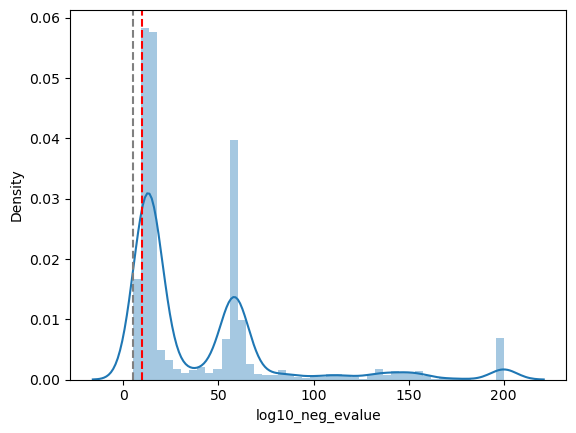

In [5]:
### E-value distribution

sns.distplot(blastp_MMO_output['log10_neg_evalue'], kde=True)
plt.axvline(x=5, color='gray', linestyle='--')
plt.axvline(x=10, color='red', linestyle='--')

Text(0.5, 1.0, 'Hit Sequence Length Distribution')

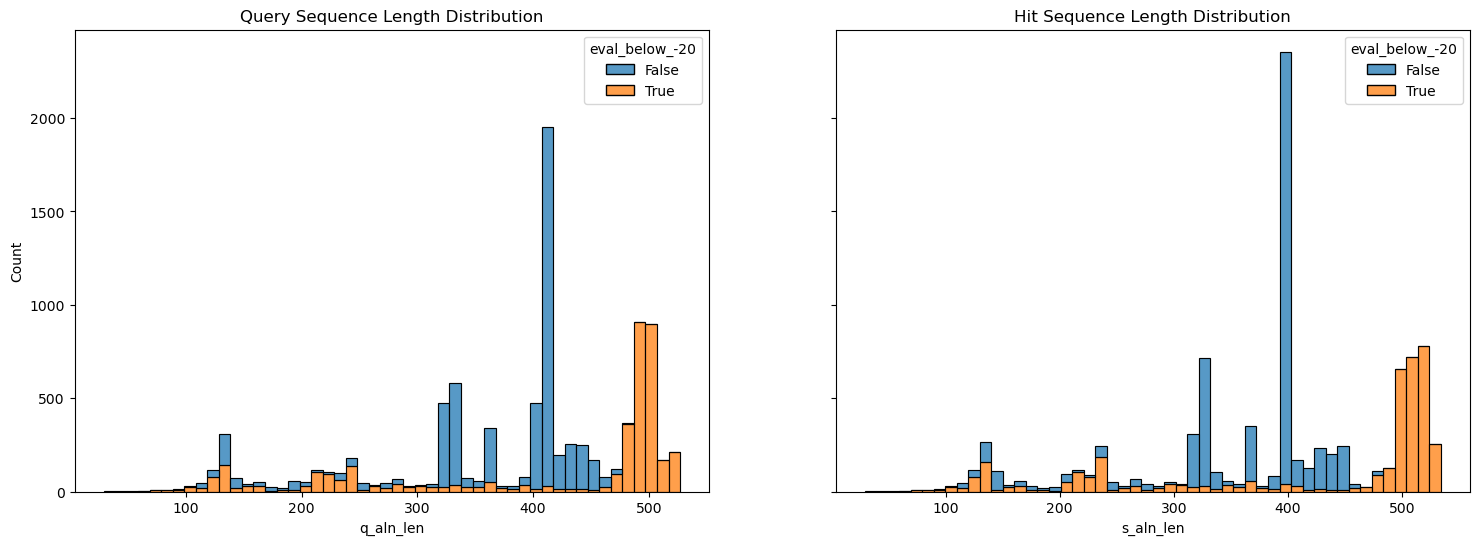

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

blastp_MMO_output['eval_below_-20'] = blastp_MMO_output['log10_neg_evalue'] > 20

sns.histplot(data=blastp_MMO_output, x='q_aln_len', hue='eval_below_-20', multiple="stack", bins=50, ax=ax[0])
sns.histplot(data=blastp_MMO_output, x='s_aln_len', hue='eval_below_-20', multiple="stack", bins=50, ax=ax[1])
ax[0].set_title('Query Sequence Length Distribution')
ax[1].set_title('Hit Sequence Length Distribution')

### There are a bunch of sequences (300-460 AAs) that are not that short but have comparatively lower e-values; These could be the potential homologs of interest!

## Combining the sequence titles and assigning them a recognizable name

In [7]:
## Get the unique titles of the sequences

### Remove the organisms info from title
blastp_MMO_output['stitle_wo_organism'] = blastp_MMO_output['stitle'].apply(lambda x: x.split(' [')[0])

unique_stitles = blastp_MMO_output['stitle'].unique()
unique_stitles_wo_organism = blastp_MMO_output['stitle_wo_organism'].unique()
print("len(unique_stitles):", len(unique_stitles), ";   len(unique_stitles_wo_organism):", len(unique_stitles_wo_organism))

unique_stitles_wo_organism

len(unique_stitles): 4385 ;   len(unique_stitles_wo_organism): 232


array(['MULTISPECIES: aromatic/alkene monooxygenase hydroxylase subunit alpha',
       'aromatic/alkene monooxygenase hydroxylase subunit alpha',
       'Chain A, METHANE MONOOXYGENASE COMPONENT A, ALPHA CHAIN',
       'aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha',
       'Chain D, METHANE MONOOXYGENASE HYDROLASE (ALPHA CHAIN)',
       'MAG: methane monooxygenase', 'methane monooxygenase',
       'soluble methane monooxygenase hydroxylase component alpha subunit',
       'soluble methane monooxygenase hydroxylase component alpha-subunit',
       'soluble methane monooxygenase protein A alpha subunit',
       'protein A alpha subunit of soluble methane monooxygenase',
       'Chain D, METHANE MONOOXYGENASE HYDROXYLASE',
       'Chain A, Methane monooxygenase component A alpha chain',
       'MmoX, partial', 'hypothetical protein',
       'soluble methane monooxygenase alpha subunit, partial',
       'soluble methane monooxygenase component a, partial',
    

In [8]:
## Assign the partial variable variable info on the pd df

## Check if the title contains 'partial' and assign it to a new column
blastp_MMO_output['partial'] = blastp_MMO_output['stitle_wo_organism'].apply(lambda x: 'partial' in x.lower())
blastp_MMO_output

,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue,eval_below_-20,stitle_wo_organism,partial
0,1,527,1,527,WP_010960482,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False
1,1,527,1,527,WP_333689019,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False
2,1,527,1,527,1FYZ_A,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",False
3,1,527,1,527,WP_198323378,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPASVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False
4,1,526,1,526,WP_266022270,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,526,526,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,46,387,37,374,WP_415070450,toluene monooxygenase [Hyphomicrobium sp.],0.000008,527,YGIGMEFWEEFDEPYKVTYRDYVQTQREKEVGAYSVKSATSRSEFY...,342,338,5.080922,False,toluene monooxygenase,False
9371,201,393,2,191,WP_325692884,"YHS domain-containing protein, partial [Mycoba...",0.000009,527,AIQLNFVFETGFTNLQFMAMAALADRAHHHLFEKTLASIQTDEARH...,193,190,5.037157,False,"YHS domain-containing protein, partial",True
9372,57,383,22,343,MFZ9238208,phenol 2-monooxygenase [Burkholderiaceae bacte...,0.000009,527,QDPFKMTLDVWWRQQSEKDRRLYAVLDAFAQNNGQIGVSDARYVNA...,327,322,5.025488,False,phenol 2-monooxygenase,False
9373,185,387,35,234,MFZ0874727,MmoB/DmpM family protein [Pseudonocardiaceae b...,0.000010,527,RATFDGMMMNPNVVDVAVQLPFTFETGFTNVQFVALSADALESGDI...,203,200,5.019542,False,MmoB/DmpM family protein,False


<Axes: xlabel='s_aln_len', ylabel='Count'>

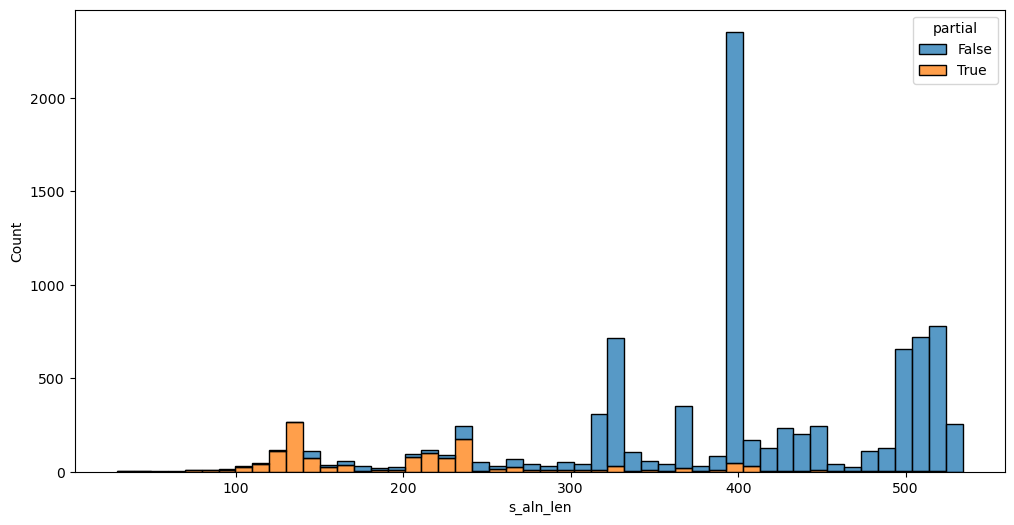

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(data=blastp_MMO_output, x='s_aln_len', hue='partial', multiple="stack", bins=50)

## Manually curating the different groups of sequences based on the title

In [10]:
Methane_monooxygenase = [
'Chain A, METHANE MONOOXYGENASE COMPONENT A, ALPHA CHAIN',
'aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha',
'Chain D, METHANE MONOOXYGENASE HYDROLASE (ALPHA CHAIN)',
'MAG: methane monooxygenase',
'methane monooxygenase',
'soluble methane monooxygenase hydroxylase component alpha subunit',
'soluble methane monooxygenase hydroxylase component alpha-subunit',
'soluble methane monooxygenase protein A alpha subunit',
'protein A alpha subunit of soluble methane monooxygenase',
'Chain D, METHANE MONOOXYGENASE HYDROXYLASE',
'Chain A, Methane monooxygenase component A alpha chain',
'MmoX, partial',
'soluble methane monooxygenase alpha subunit, partial',
'soluble methane monooxygenase component a, partial',
'soluble methane monooxygenase A-subunit, partial',
'soluble methane monooxygenase alpha subunit',
'MULTISPECIES: methane monooxygenase',
'soluble methane monooxygenase protein A, partial',
'soluble methane monooxygenase, partial',
'soluble methane monooxygenase component A alpha subunit, partial',
'MAG: methane monooxygenase, partial',
'soluble methane monooxygenase alpha, subunit, partial',
'soluble methane monooxygenase, alpha subunit, partial',
'methane monooxygenase component A alpha chain',
'soluble methane monooxygenase hydroxylase, partial',
'soluble methane monooxygenase component A alpha subunit',
'methane monooxygenase, partial',
'soluble methane monooxygenase active site subunit, partial',
'soluble methane monooxygenase alpha-subunit, partial',
'soluble methane monooxygenase subunit A, partial',
'soluble methane mooxygenase alpha subunit, partial',
'Mmox, partial',
'soluble methane monooxygenase A-protein alpha-subunit, partial',
'MULTISPECIES: aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha',
'Methane monooxygenase component A alpha chain',
'soluble methane monooxygenase protein A large subunit, partial',
'methane monooxygenase component A alpha subunit, partial',
'methane oxidase, partial',
'Methane monooxygenase component alpha chain',
'Methane monooxygenase',
'methane monooxygenase subunit A alpha, partial',
'souble methane monooxygenase, partial',
'MAG: Methane monooxygenase component A alpha chain',
'MAG: aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha',
'soluble methane monooxygenase A alpha chain, partial',
'methane/phenol/toluene hydroxylase subunit alpha',
'putative methane/phenol/toluene monooxygenase subunit, Alpha chain',
'[similarity to] soluble methane monooxygenase hydroxylase component alpha-subunit',
'methane monooxygenase component A alpha chain, partial',
'aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha, partial',
'methane/phenol/toluene monooxygenase alpha subunit',
'mmoX',
'MULTISPECIES: aromatic/alkene/methane monooxygenase hydroxylase/oxygenase subunit alpha, partial',
'Methane monooxygenase component A alpha chain EC 1141325 CDS',
'MAG: Methane monooxygenase component A alpha chain, partial',
'methane monooxygenase alpha subunit, partial'
]

Propane_monooxygenase = [
'propane monooxygenase hydroxylase large subunit',
'propane 2-monooxygenase large subunit',
'propane monooxygenase large subunit',
'propane monooxygenase hydroxylase alpha subunit',
'MAG: propane monooxygenase large subunit PrmA',
'putative phenol and propane monooxygenase large subunit',
'propane monooxygenase hydroxylase large subunit, partial',
'propane monooxygenase large subunit, partial',
'Propane monooxygenase large subunit',
'Propane 2-monooxygenase, hydroxylase component large subunit',
'propane monooxygenase, partial',
'apropane monooxygenase, partial'
]

Toluene_monooxygenase = [
'phenol/toluene 2-monooxygenase',
'toluene monooxygenase',
'toluene ortho-monooxygenase subunit',
'Toluene-4-monooxygenase, subunit TmoA',
'Toluene-4-monooxygenase system protein A',
'toluene-4-monooxygenase system B family protein',
'MAG: toluene monooxygenase',
'toluene monooxygenase system protein',
'toluene 4-monooxygenase protein A',
'toluene monooxygenase system protein A',
'toluene 4-monooxygenase protein',
'toluene-4-monooxygenase system, hydroxylase component subunit alpha',
'phenol/toluene 2-monooxygenase (NADH) P3/A3',
'MULTISPECIES: Toluene-4-monooxygenase system protein A',
'methane/phenol/toluene monooxygenase',
'Toluene-4-monooxygenase system, hydroxylase component subunit alpha',
'MAG: toluene monooxygenase system protein A',
'MULTISPECIES: toluene monooxygenase',
'toluene o-xylene monooxygenase component',
'Chain A, Toluene, o-xylene monooxygenase oxygenase subunit',
'toluene-4-monooxygenase subunit TmoA',
'MAG: toluene monooxygenase, partial',
'Chain A, Toluene o-xylene monooxygenase component',
'toluene monooxygenase, partial',
'Chain A, Toluene, o-xylene monooxygenase oxygenase subunit;alpha',
'Toluene-4-monooxygenase system protein',
'toluene-4-monooxygenase system protein A',
'toluene-4-monooxygenase system hydroxylase subunit alpha TmoA',
'Chain A, Toluene-4-monooxygenase system protein A',
'MAG: Toluene-4-monooxygenase system protein A',
'toluene-4-monooxygenase',
'toluene-3-monooxygenase oxygenase subunit 1',
'MULTISPECIES: toluene-4-monooxygenase system hydroxylase subunit alpha TmoA',
'Methane/phenol/toluene hydroxylase',
'MAG: toluene monooxygenase system protein A, partial'
]

Other_monooxygenase = [
'MULTISPECIES: aromatic/alkene monooxygenase hydroxylase subunit alpha',
'aromatic/alkene monooxygenase hydroxylase subunit alpha',
'butane monooxygenase hydroxylase BMOH alpha subunit',
'butane monooxygenase alpha subunit',
'putative butane monooxygenase alpha subunit, partial',
'monooxygenase',
'monooxygenase hydroxylase, subunit',
'class 6 soluble di-iron monooxygenase alpha subunit',
'MAG: monooxygenase',
'monooxygenase, partial',
'alkene monooxygenase alpha subunit',
'putative soluble di-iron monooxygenase alpha subunit',
'MULTISPECIES: monooxygenase hydroxylase, subunit A',
'soluble di-iron monooxygenase alpha subunit, partial',
'alkene monooxygenase alpha-subunit',
'ethene monooxygenase alpha subunit',
'putative alkene monooxygenase alpha subunit',
'Soluble di-iron monooxygenase alpha subunit',
'soluble di-iron monooxygenase alpha subunit',
'alpha-subunit of multicomponent tetrahydrofuran monooxygenase',
'tetrahydrofuran monooxygenase oxygenase component alpha subunit',
'putative monooxygenase alpha subunit',
'multicomponent tetrahydrofuran-degrading monooxygenase alhpa-subnit',
'alkene monooxygenase alpha subunit, partial',
'soluble Di-iron monooxygenase alpha subunit, partial',
'multicomponent tetrahydrofuran-degrading monooxygenase alhpa-subunit, partial',
'phenol 2-monooxygenase',
'MAG: phenol 2-monooxygenase',
'multicomponent tetrahydrofuran-degrading monooxygenase alpha-subnit, partial',
'soluble di-iron monooxygenase, partial',
'phenol 2-monooxygenase, partial',
'phenol 2-monooxygenase subunit',
'MAG: phenol 2-monooxygenase P3 subunit',
'isoprene monooxygenase oxygenase subunit alpha',
'Alkene monooxygenase system, oxygenase component subunit alpha',
'Tbc1D monooxygenase',
'MAG: phenol 2-monooxygenase, partial',
'MULTISPECIES: isoprene monooxygenase oxygenase subunit alpha',
'tetrahydrofuran monooxygenase, partial',
'MAG: isoprene monooxygenase oxygenase subunit alpha, partial',
'isoprene monooxygenase hydroxylase alpha subunit, partial',
'RecName: Full=Alkene monooxygenase system, oxygenase component subunit alpha',
'benzene monooxygenase oxygenase subunit',
'phenol 2-monooxygenase oxygenase component DmpN',
'MULTISPECIES: phenol 2-monooxygenase oxygenase component DmpN',
'Tbc2A monooxygenase',
'phenol 2-monooxygenase P3 subunit',
'phenol 2-monooxygenase oxygenase component DmpN, partial',
'putative alkene monooxygenase alpha subunit, partial',
'MULTISPECIES: phenol 2-monooxygenase',
'putative monooxygenase large subunit A, partial',
'soluble diiron monooxygenase, partial'
]

hypothetical_proteins = [
'hypothetical protein',
'hypothetical protein NpR2053_10190',
'hypothetical protein ACQPW4_26220',
'hypothetical protein, partial',
'MULTISPECIES: hypothetical protein',
'hypothetical protein ACQP2A_17340',
'hypothetical protein ACQPZV_25600',
'hypothetical protein NpR2053_10180',
'hypothetical protein BDC11040_39260',
'hypothetical protein BRDID11002_11430',
'hypothetical protein BRDID11015_30610',
'hypothetical protein GCM10027597_59960',
'hypothetical protein MOKP106_40350',
'MAG: hypothetical protein FD131_934',
'hypothetical protein BRDID11015_30620',
'MAG: hypothetical protein E6J03_05350',
'hypothetical protein N801_04700, partial'
]

Different_hydroxylases = [
'hydroxylase alpha subunit, partial',
'alpha hydroxylase',
'hydroxylase component subunit alpha, partial',
'toluene hydroxylase',
'methane/phenol/toluene hydroxylase',
'phenol hydroxylase P3 protein',
'phenolhydroxylase component',
'phenol hydroxylase component 3',
'phenol hydroxylase, partial',
'phenol hydroxylase oxygenase component',
'phenol hydroxylase oxygenase component alfa oxygenase subunit',
'phenol hydroxylase subunit',
'MAG: phenol hydroxylase oxygenase subuit',
'Chain A, Phenol hydroxylase component phN',
'MULTISPECIES: methane/phenol/toluene hydroxylase',
'Methane/phenol/toluene hydroxylase:YHS',
'phenol hydroxylase alpha subunit, partial',
'Phenol hydroxylase, P3 oxygenase component DmpN',
'MAG: Phenol hydroxylase, P3 oxygenase component DmpN',
'phenol hydroxylase component',
'phenol hydroxylase component phN',
'methane/phenol/toluene hydroxylase:YHS',
'subunit of phenolhydroxylase',
'phenol hydroxylase',
'hydroxylase subunit 4',
'phenol hydroxylase P3 protein, partial',
'methane/phenol/toluene hydroxylase, partial',
'phenol hydroyxlase large-subunit, partial',
'multi-component phenol hydoxylase subunit alpha LapN'
]

YHS_domain_protein = [
'YHS domain-containing protein',
'MULTISPECIES: YHS domain-containing protein',
'MAG: YHS domain-containing protein',
'YHS domain-containing protein, partial',
'MAG: YHS domain-containing protein, partial'
]

Other = [
'PmoC',
'SDIMOs-alpha subunit',
'2Fe-2S iron-sulfur cluster-binding protein',
'unnamed protein product, partial',
'TCP-1/cpn60 chaperonin family protein',
'PmlD',
'MEDS domain-containing protein',
'MAG: lapN',
'MphN',
'phenol hydrolase subunit alpha',
'dimethylsulfoxide oxygenase delta subunit',
'DMS oxygenase component',
'HpdC',
'BtxD',
'tmoA',
'catechol dioxygenase',
'TomA3',
'DmpN',
'BtxP',
'PheN',
'alpha subunit-terminal oygenase component',
'ComEC/Rec2 family competence protein',
'MmoB/DmpM family protein',
'B100',
'H47'
]

In [11]:
major_group_names_ids = ["Methane_monooxygenase", "Propane_monooxygenase", "Toluene_monooxygenase", "Other_monooxygenase", "hypothetical_proteins", "Different_hydroxylases", "YHS_domain_protein", "Other"]
major_group_names = [Methane_monooxygenase, Propane_monooxygenase, Toluene_monooxygenase, Other_monooxygenase, hypothetical_proteins, Different_hydroxylases, YHS_domain_protein, Other]
major_group_dict = {}

for i in range(len(major_group_names)):
    for j in major_group_names[i]:
        major_group_dict[j] = major_group_names_ids[i]

blastp_MMO_output['major_group'] = blastp_MMO_output['stitle_wo_organism'].map(major_group_dict)
blastp_MMO_output

,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue,eval_below_-20,stitle_wo_organism,partial,major_group
0,1,527,1,527,WP_010960482,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False,Other_monooxygenase
1,1,527,1,527,WP_333689019,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False,Other_monooxygenase
2,1,527,1,527,1FYZ_A,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",False,Methane_monooxygenase
3,1,527,1,527,WP_198323378,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPASVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False,Other_monooxygenase
4,1,526,1,526,WP_266022270,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,526,526,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False,Other_monooxygenase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,46,387,37,374,WP_415070450,toluene monooxygenase [Hyphomicrobium sp.],0.000008,527,YGIGMEFWEEFDEPYKVTYRDYVQTQREKEVGAYSVKSATSRSEFY...,342,338,5.080922,False,toluene monooxygenase,False,Toluene_monooxygenase
9371,201,393,2,191,WP_325692884,"YHS domain-containing protein, partial [Mycoba...",0.000009,527,AIQLNFVFETGFTNLQFMAMAALADRAHHHLFEKTLASIQTDEARH...,193,190,5.037157,False,"YHS domain-containing protein, partial",True,YHS_domain_protein
9372,57,383,22,343,MFZ9238208,phenol 2-monooxygenase [Burkholderiaceae bacte...,0.000009,527,QDPFKMTLDVWWRQQSEKDRRLYAVLDAFAQNNGQIGVSDARYVNA...,327,322,5.025488,False,phenol 2-monooxygenase,False,Other_monooxygenase
9373,185,387,35,234,MFZ0874727,MmoB/DmpM family protein [Pseudonocardiaceae b...,0.000010,527,RATFDGMMMNPNVVDVAVQLPFTFETGFTNVQFVALSADALESGDI...,203,200,5.019542,False,MmoB/DmpM family protein,False,Other


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Other_monooxygenase'),
  Text(1, 0, 'Methane_monooxygenase'),
  Text(2, 0, 'hypothetical_proteins'),
  Text(3, 0, 'Different_hydroxylases'),
  Text(4, 0, 'YHS_domain_protein'),
  Text(5, 0, 'Propane_monooxygenase'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Toluene_monooxygenase')])

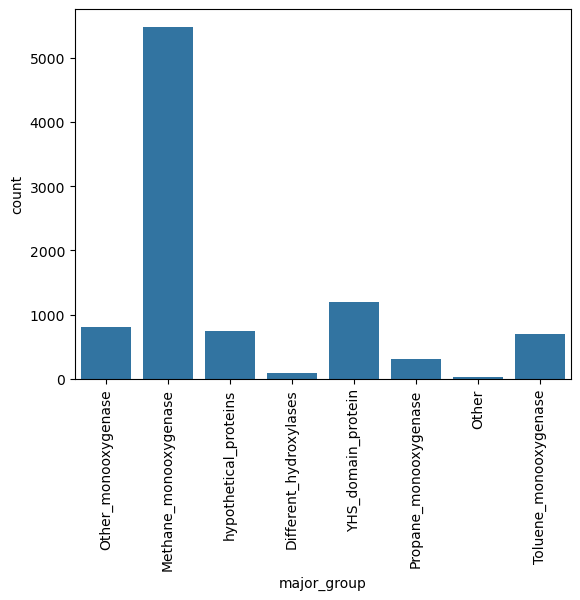

In [12]:
sns.countplot(data=blastp_MMO_output, x='major_group')
plt.xticks(rotation=90)

### Deleting the hypothetical proteins

In [13]:
blastp_MMO_output = blastp_MMO_output[blastp_MMO_output['major_group'] != 'hypothetical_proteins']
blastp_MMO_output

,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue,eval_below_-20,stitle_wo_organism,partial,major_group
0,1,527,1,527,WP_010960482,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False,Other_monooxygenase
1,1,527,1,527,WP_333689019,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False,Other_monooxygenase
2,1,527,1,527,1FYZ_A,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,"Chain A, METHANE MONOOXYGENASE COMPONENT A, AL...",False,Methane_monooxygenase
3,1,527,1,527,WP_198323378,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPASVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False,Other_monooxygenase
4,1,526,1,526,WP_266022270,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,526,526,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False,Other_monooxygenase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,46,387,37,374,WP_415070450,toluene monooxygenase [Hyphomicrobium sp.],0.000008,527,YGIGMEFWEEFDEPYKVTYRDYVQTQREKEVGAYSVKSATSRSEFY...,342,338,5.080922,False,toluene monooxygenase,False,Toluene_monooxygenase
9371,201,393,2,191,WP_325692884,"YHS domain-containing protein, partial [Mycoba...",0.000009,527,AIQLNFVFETGFTNLQFMAMAALADRAHHHLFEKTLASIQTDEARH...,193,190,5.037157,False,"YHS domain-containing protein, partial",True,YHS_domain_protein
9372,57,383,22,343,MFZ9238208,phenol 2-monooxygenase [Burkholderiaceae bacte...,0.000009,527,QDPFKMTLDVWWRQQSEKDRRLYAVLDAFAQNNGQIGVSDARYVNA...,327,322,5.025488,False,phenol 2-monooxygenase,False,Other_monooxygenase
9373,185,387,35,234,MFZ0874727,MmoB/DmpM family protein [Pseudonocardiaceae b...,0.000010,527,RATFDGMMMNPNVVDVAVQLPFTFETGFTNVQFVALSADALESGDI...,203,200,5.019542,False,MmoB/DmpM family protein,False,Other


In [14]:
query_1mty_seq = "MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKYATKYKMANETKEQFKLIAKEYARMEAVKDERQFGSLQDALTRLNAGVRVHPKWNETMKVVSNFLEVGEYNAIAATGMLWDSAQAAEQKNGYLAQVLDEIRHTHQCAYVNYYFAKNGQDPAGHNDARRTRTIGPLWKGMKRVFSDGFISGDAVECSLNLQLVGEACFTNPLIVAVTEWAAANGDEITPTVFLSIETDELRHMANGYQTVVSIANDPASAKYLNTDLNNAFWTQQKYFTPVLGMLFEYGSKFKVEPWVKTWNRWVYEDWGGIWIGRLGKYGVESPRSLKDAKQDAYWAHHDLYLLAYALWPTGFFRLALPDQEEMEWFEANYPGWYDHYGKIYEEWRARGCEDPSSGFIPLMWFIENNHPIYIDRVSQVPFCPSLAKGASTLRVHEYNGQMHTFSDQWGERMWLAEPERYECQNIFEQYEGRELSEVIAELHGLRSDGKTLIAQPHVRGDKLWTLDDIKRLNCVFKNPVKAFN"

In [15]:
seq_id_wrt_query = []

def compute_pairwise_identity(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
    if not alignments:
        return 0.0
    alignment = alignments[0]
    matches = sum(c1 == c2 for c1, c2 in zip(alignment.seqA, alignment.seqB))
    identity = matches / max(len(seq1), len(seq2))
    return identity

for idx, row in blastp_MMO_output.iterrows():
    seq = row['sseq']
    identity = compute_pairwise_identity(seq, query_1mty_seq)
    seq_id_wrt_query.append(identity)

blastp_MMO_output['identity_wrt_query'] = seq_id_wrt_query

/tmp/ipykernel_705038/2155280581.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blastp_MMO_output['identity_wrt_query'] = seq_id_wrt_query


<Axes: xlabel='identity_wrt_query', ylabel='Count'>

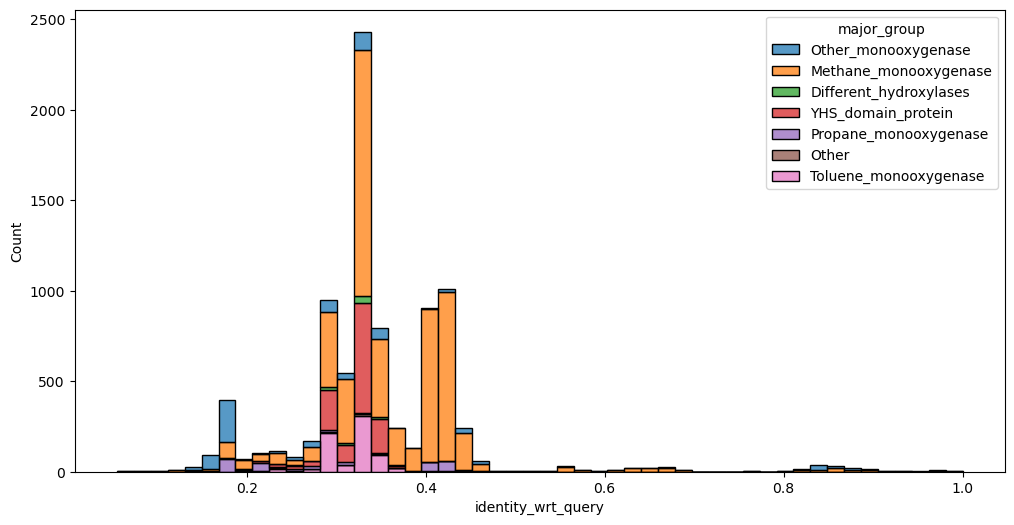

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(data=blastp_MMO_output, x='identity_wrt_query', hue="major_group", multiple="stack", bins=50)

### Write the sequences from pd df to a fasta file

Aims: Remove redundant sequences -- perform clustering based on identity

In [ ]:
fasta_writeable = [SeqRecord(Seq(row['sseq']), id=row['sacc'], description="") for _, row in blastp_MMO_output.iterrows()]
SeqIO.write(fasta_writeable, "/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_ncbi_nr/MMO_blast_output_seqs.fasta", "fasta")

8639

NOTE: The above written fasta doesn't have the sequence entries that have the `Hypothetical_proteins` annotation.

In [ ]:
### Clustering the identical sequences using cd-hit
~/packages/cdhit-master/cd-hit -i MMO_blast_output_seqs.fasta -o MMO_blast_output_seqs.c1.fasta -c 1.0

### Clustering the sequences using cd-hit, at 90% seq_id
~/packages/cdhit-master/cd-hit -i MMO_blast_output_seqs.c1.fasta -o MMO_blast_output_seqs.c0.9.fasta -c 0.9

### Aligning the sequences using MAFFT
mafft --anysymbol --maxiterate 1000 --thread 15 MMO_blast_output_seqs.c0.9.fasta > MMO_blast_output_seqs.c0.9.mafft.fasta

### Making IQ-Tree Phylogeny
iqtree -s ./MMO_blast_output_seqs.c0.9.mafft.fasta -m MFP_MERGE --seqtype AA -B 1000 --alrt 1000 -bnni -T 15

## For rooting the tree using different methods (Use the `phylogeny` conda environment)
python ~/packages/MinVar-Rooting/FastRoot.py -m MP -i MMO_blast_output_seqs.c0.9.mafft.fasta.treefile -o MMO_blast_output_seqs.c0.9.mafft.fasta.MP_rooted.treefile

Topology of the phylogenetic tree across the 3 different rooting methods looks the same!

### Read back the sequences after clustering

In [ ]:
MMO_blastp_clustered_c09_msa = pd.DataFrame.from_records([item.__dict__ for item in SeqIO.parse('/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_ncbi_nr/MMO_blast_output_seqs.c0.9.mafft.fasta', format='fasta')])
MMO_blastp_clustered_c09_msa.drop(columns=['name', 'description', 'dbxrefs','features','annotations','_per_letter_annotations'], inplace=True)
MMO_blastp_clustered_c09_msa.columns = ['MSA', 'id']

In [ ]:
blastp_MMO_output_after_clustering = pd.merge(MMO_blastp_clustered_c09_msa, blastp_MMO_output, left_on='id', right_on='sacc', how='left')
blastp_MMO_output_after_clustering.to_csv('/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_ncbi_nr/MMO_blastp_output_after_clustering_information.tsv', sep='\t', index=False)
blastp_MMO_output_after_clustering

,MSA,id,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue,eval_below_-20,stitle_wo_organism,partial,major_group,identity_wrt_query
0,"(-, M, A, -, -, -, -, -, -, L, S, T, A, T, K, ...",WP_010960482,1,527,1,527,WP_010960482,MULTISPECIES: aromatic/alkene monooxygenase hy...,0.000000,527,MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,527,527,200.000000,True,MULTISPECIES: aromatic/alkene monooxygenase hy...,False,Other_monooxygenase,1.000000
1,"(-, M, A, -, -, -, -, -, -, I, S, T, A, T, K, ...",MFZ2725930,1,526,1,527,MFZ2725930,aromatic/alkene/methane monooxygenase hydroxyl...,0.000000,527,MAISTATKAATDALAVNRAPTSVNAQEVHRWLQSFTWDFEKNRTKY...,526,527,200.000000,True,aromatic/alkene/methane monooxygenase hydroxyl...,False,Methane_monooxygenase,0.903226
2,"(-, M, A, -, -, -, -, -, -, I, S, A, A, T, Q, ...",WP_348758608,1,527,1,527,WP_348758608,aromatic/alkene monooxygenase hydroxylase subu...,0.000000,527,MAISAATQAATDALAAHRAPTTVGAQEVHRWMQSFNWSFKNNRTKY...,527,527,200.000000,True,aromatic/alkene monooxygenase hydroxylase subu...,False,Other_monooxygenase,0.901328
3,"(-, M, A, -, -, -, -, -, -, I, S, L, A, T, K, ...",NMM29078,1,523,1,524,NMM29078,methane monooxygenase [Glaciimonas sp.],0.000000,527,MAISLATKAATDALALNRAPTGVGAQEVHKWMQDFNWDFKSNRTKY...,523,524,200.000000,True,methane monooxygenase,False,Methane_monooxygenase,0.855787
4,"(-, M, A, -, -, -, -, -, -, L, S, T, A, T, K, ...",MCK9193263,1,526,1,526,MCK9193263,aromatic/alkene/methane monooxygenase hydroxyl...,0.000000,527,MALSTATKAATDALSVNRAPTTVGPQEVHKWMQSFNWDFKNNRTKY...,526,526,200.000000,True,aromatic/alkene/methane monooxygenase hydroxyl...,False,Methane_monooxygenase,0.848197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",WP_129451466,58,388,49,374,WP_129451466,YHS domain-containing protein [Methylibium sp....,0.000004,527,EPYKVTYPEYVKTQREKDAGAYSVKAALERSQMFERADPGWLSVLK...,331,326,5.356547,False,YHS domain-containing protein,False,YHS_domain_protein,0.292220
1197,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",ALU84872,305,497,1,201,ALU84872,propane monooxygenase hydroxylase large subuni...,0.000007,527,WHRWIYDDSYRSYLIPLEKYGLVIPHDLIEEAWNQIWNKGYVREVA...,193,201,5.162412,False,propane monooxygenase hydroxylase large subuni...,True,Propane_monooxygenase,0.210626
1198,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MFO1108077,46,464,37,444,MFO1108077,YHS domain-containing protein [Bradyrhizobium ...,0.000008,527,YGISFEEWETYDEPYKVSYREYVAVQREKDSGAYSVKAALLRSKYY...,419,408,5.102923,False,YHS domain-containing protein,False,YHS_domain_protein,0.318786
1199,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",WP_415070450,46,387,37,374,WP_415070450,toluene monooxygenase [Hyphomicrobium sp.],0.000008,527,YGIGMEFWEEFDEPYKVTYRDYVQTQREKEVGAYSVKSATSRSEFY...,342,338,5.080922,False,toluene monooxygenase,False,Toluene_monooxygenase,0.282732


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Other_monooxygenase'),
  Text(1, 0, 'Methane_monooxygenase'),
  Text(2, 0, 'YHS_domain_protein'),
  Text(3, 0, 'Propane_monooxygenase'),
  Text(4, 0, 'Toluene_monooxygenase'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Different_hydroxylases')])

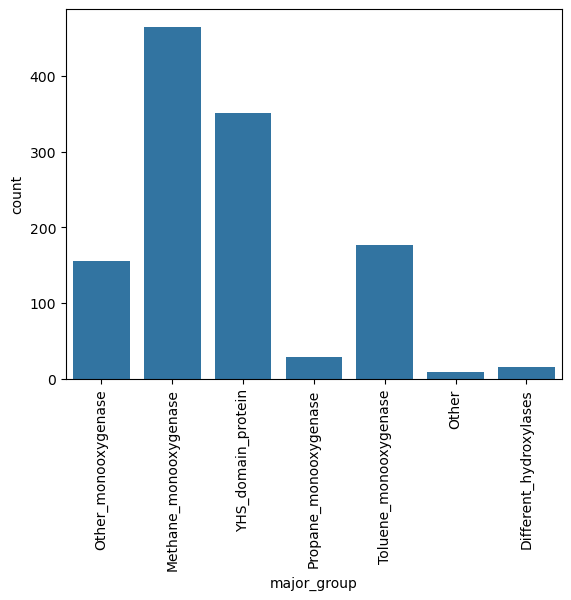

In [19]:
sns.countplot(data=blastp_MMO_output_after_clustering, x='major_group')
plt.xticks(rotation=90)

<Axes: xlabel='identity_wrt_query', ylabel='Count'>

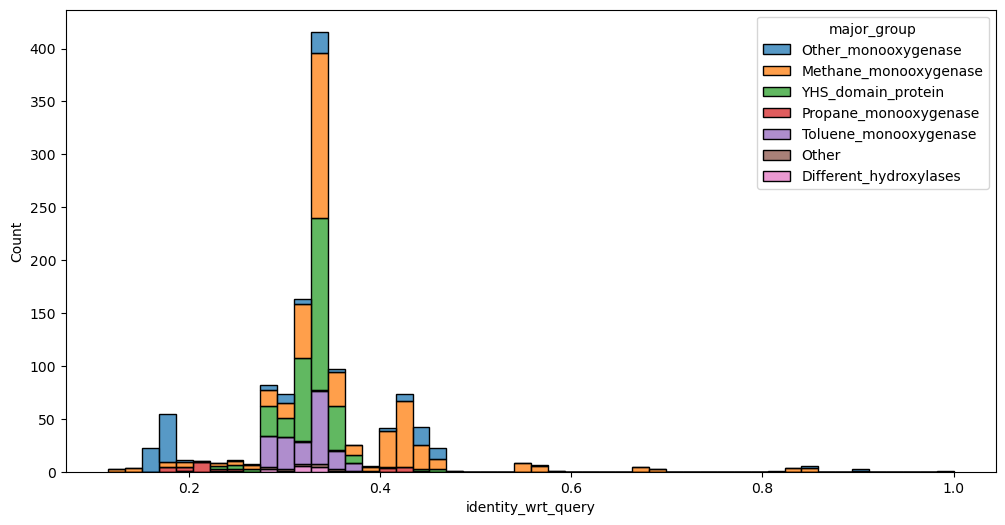

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(data=blastp_MMO_output_after_clustering, x='identity_wrt_query', hue="major_group", multiple="stack", bins=50)

In [23]:
blastp_MMO_output_after_clustering.query('major_group == "YHS_domain_protein"')

,MSA,id,qstart,qend,sstart,send,sacc,stitle,evalue,qlen,sseq,q_aln_len,s_aln_len,log10_neg_evalue,eval_below_-20,stitle_wo_organism,partial,major_group,identity_wrt_query
35,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MBI2964566,27,524,6,499,MBI2964566,YHS domain-containing protein [Deltaproteobact...,4.930000e-130,527,EAHNRVKDFDWEPSYAKKPTRYPTRYRIPAKTKDPFRHLIRDYLSM...,498,494,129.307153,True,YHS domain-containing protein,False,YHS_domain_protein,0.461101
72,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MGH8007655,22,524,2,499,MGH8007655,YHS domain-containing protein [Candidatus Bina...,5.950000e-108,527,ALNHIQAHEKIKGMEWDFSYAEPRAQFQTTFHIPKKGKDPFRHLIR...,503,498,107.225483,True,YHS domain-containing protein,False,YHS_domain_protein,0.442125
74,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MEW6300538,22,525,2,500,MEW6300538,YHS domain-containing protein [Thermodesulfoba...,1.570000e-105,527,AVNLIQAHEKVKGLEWEFSYADPTPQVQTKFHIPKKGKDPFRHLIR...,504,499,104.804100,True,YHS domain-containing protein,False,YHS_domain_protein,0.453510
138,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",WP_103684344,43,522,25,497,WP_103684344,YHS domain-containing protein [Zhongshania mar...,2.040000e-65,527,KTVETTKFHIHETKPNDPFKTFVREYCEQEQEKDDRHYALLEASAR...,480,473,64.690370,True,YHS domain-containing protein,False,YHS_domain_protein,0.411765
141,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MBI2800181,58,514,43,491,MBI2800181,YHS domain-containing protein [Gammaproteobact...,3.740000e-65,527,DPFKTFVREYFDMEQEKDNRHYAILEASSRLSSGQPDARWMEGMKF...,457,449,64.427128,True,YHS domain-containing protein,False,YHS_domain_protein,0.379507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MBE9548788,57,464,47,443,MBE9548788,YHS domain-containing protein [Pseudomonadota ...,5.060000e-07,527,EDPFRMTMDSYWKYQGEKEKKLYAIIDAFAQNNGHTNLSDGRYLNA...,408,397,6.295849,False,YHS domain-containing protein,False,YHS_domain_protein,0.326376
1190,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",MBV8878624,217,464,2,240,MBV8878624,YHS domain-containing protein [Planctomycetace...,7.470000e-07,527,FVGLSSLARNVGDRMFEKMVQSIQTDEARHSQIGPAVLKKIVEKDP...,248,239,6.126679,False,YHS domain-containing protein,False,YHS_domain_protein,0.239089
1192,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",HKE18720,228,464,7,234,HKE18720,YHS domain-containing protein [Kofleriaceae ba...,1.070000e-06,527,GDRMFENMLRSIQTDEARHSQIGPAVLRILIEHDRDYAQYLLDKWF...,237,228,5.970616,False,YHS domain-containing protein,False,YHS_domain_protein,0.227704
1196,"(-, -, -, -, -, -, -, -, -, -, -, -, -, -, -, ...",WP_129451466,58,388,49,374,WP_129451466,YHS domain-containing protein [Methylibium sp....,4.400000e-06,527,EPYKVTYPEYVKTQREKDAGAYSVKAALERSQMFERADPGWLSVLK...,331,326,5.356547,False,YHS domain-containing protein,False,YHS_domain_protein,0.292220
